<a href="https://colab.research.google.com/github/afratzscher/COMP551/blob/main/COMP551_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#COMP551 Project 3: Classification of Image Data

#HOW TO RUN
To run the code, first run the "import packages" code.

# IMPORT PACKAGES

Import packages


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import np_utils # for one-hot coding

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.debugger import set_trace         #for debugging 

np.random.seed(123)

# Task 1: Acquire data
NOTE: you must run the methods in order (import, then vectorize, then normalize), as vectorization will vectorize a second time if run twice

Import data

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    # Returns tuple of Numpy arrays: (x_train, y_train), (x_test, y_test).
    # x_train, x_test: uint8 arrays of grayscale image data with shapes (num_samples, 28, 28).
      # instance of x = 28x28 array with values between 0 (black) and 255 (white) -> is an image of a handwritten number
    # y_train, y_test: uint8 arrays of digit labels (integers in range 0-9) with shapes (num_samples,).
print("Number of training instances: " + str(len(x_train)))
print("Number of testing instances: " + str(len(x_test)))

11493376/11490434 [==============================] - 0s 0us/step
Number of training instances: 60000
Number of testing instances: 10000


Plotting a few examples

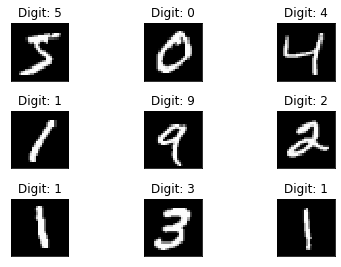

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

Vectorize x

In [ ]:
print("Initial x_train shape: ", x_train.shape) # initial shape = (60000, 28, 28)
# print("y_train shape", y_train.shape)
print("Initial x_test shape", x_test.shape) # initial shape = (10000, 28, 28)
# print("y_test shape", y_test.shape)

#want to change from 60000x28x28 to 60000x784 (784 = 28x28) to get vector
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print("Vectorized x_train shape: ", x_train.shape)
print("Vectorized x_test shape: ", x_test.shape)

Initial x_train shape:  (60000, 28, 28)
Initial x_test shape (10000, 28, 28)
Vectorized x_train shape:  (60000, 784)
Vectorized x_test shape:  (10000, 784)


Use one-hot coding for y

In [ ]:
# Adapted from https://nextjournal.com/gkoehler/digit-recognition-with-keras
num_classes = 10 # 10 b/c digits 0-9
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
print("Shape after one-hot encoding: ", y_train.shape)

# means instead of instance 1 have label '5', has label [0,0,0,0,0,1,0,0,0,0]

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


Normalize

In [ ]:
# option 1: normalize by changing range from 0-255 to 0-1 (from https://nextjournal.com/gkoehler/digit-recognition-with-keras)
# x_train /= 255
# x_test /= 255

# option 2: normalize using x-mean/stdev https://cs231n.github.io/neural-networks-2/#datapre
print("X_train before normalization")
print("mean: ", np.mean(x_train))
print("stdev: ", np.std(x_train))
# _ = plt.hist(x_train)
# plt.show()
x_train -= np.mean(x_train, axis=0)
x_train /= np.std(x_train)

print("X_train after normalization")
print("mean: ", np.mean(x_train))
print("stdev: ", np.std(x_train))
# _ = plt.hist(x_train)
# plt.show()

print("X_test before normalization")
print("mean: ", np.mean(x_test))
print("stdev: ", np.std(x_test))
# _ = plt.hist(x_test)
# plt.show()
x_test -= np.mean(x_test, axis=0)
x_test /= np.std(x_test)

print("X_test after normalization")
print("mean: ", np.mean(x_test))
print("stdev: ", np.std(x_test))
# _ = plt.hist(x_test)
# plt.show()

X_train before normalization
mean:  33.318447
stdev:  78.567444
X_train after normalization
mean:  -7.1363386e-09
stdev:  1.0
X_test before normalization
mean:  33.79124
stdev:  79.172455
X_test after normalization
mean:  -3.9071452e-10
stdev:  1.0000006


#Task 2: Implement MLP

###EXAMPLE: MLP for multi-class softmax classification
shows that data format correct

based on: https://medium.com/data-science-bootcamp/multilayer-perceptron-mlp-vs-convolutional-neural-network-in-deep-learning-c890f487a8f1

gets 99% accuracy, 20 epochs (iterations)

also tried using 0 for initial weights -> leads to low accuracy -> better results with glorotNormal and glorotUniform (see https://keras.io/api/layers/initializers/)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.initializers import GlorotNormal

num_classes = 10
model = Sequential() #has implicit input layer added
initializer = GlorotNormal()
model.add(Dense(64, activation='relu', kernel_initializer=initializer)) #hidden layer 1
# model.add(Dropout(0.5))
  # b/c randomly dropout each unit with probability 0.5
  # runs faster BUT less accurate (95 vs 99% accuracy)
model.add(Dense(64,activation='relu', kernel_initializer=initializer)) #hidden layer 2
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', kernel_initializer=initializer))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=64)
score = model.evaluate(x_test, y_test, batch_size=64)

Epoch 1/5
938/938 [==============================] - 4s 3ms/step - loss: 0.4367 - accuracy: 0.8660
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1082 - accuracy: 0.9669
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0717 - accuracy: 0.9776
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0537 - accuracy: 0.9833
Epoch 5/5
157/157 [==============================] - 1s 2ms/step - loss: 0.0920 - accuracy: 0.9743


###MLP Class
based on https://github.com/rcassani/mlp-example/blob/master/mlp.py

In [ ]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(64,64), activation='relu',
                   solver='sgd', learning_rate='constant',  random_state=43,
                   max_iter=20)
# print "Training model..."
nn.fit(x_train,y_train)
acc = nn.score(x_test, y_test)
#pred = nn.predict(Xval)
print("Validation accuracy: {:.2f}%".format(acc * 100))

Validation accuracy: 93.81%


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#TO DO: gradient descent
#TO DO: decide on start bias (currently 0.01 b/c have issues otherwise for Relu input if 0)

# DONE: weight intialization using Glorot uniform or He normal
# DONE: forward propagation (to check)
# DONE: backpropagation (for weights and biases)
# DONE: predict

 #IDEA: for each iteration, get gradient using backpropagation
      # then, use minibatch GD to update weights
        #HYPERPARAMS TO TUNE: learning rate, number iterations (aka epochs), adaptive/constant learning rate

# IMPORTANT: assumes that all layers have same activation function (except last = softmax)

def evaluate_accuracy(pred, label):
  #convert one-hot encoding to ints
  pred = np.argmax(pred, axis=1)
  label = np.argmax(label, axis=1)
  accuracy = np.sum(pred == label)/len(pred)
  return accuracy

sigmoid = lambda z: 1./ (1 + np.exp(-z))
tanh = lambda z: np.tanh(z)
def softmax(z):
    ez = np.exp(z)
    ez_sum = np.sum(np.exp(z))
    return ez / ez_sum
def relu(z):
  return np.maximum(0, z)

def softmax_deriv(z):
  return (softmax(z) * (1 - softmax(z)))
  # softmax derivative only in case that NOT for last layer 
  # (b/c for last layer, dL/dy * dy/du = (yh - y), so use directly)
def sigmoid_deriv(z):
  return (sigmoid(z) * (1 - sigmoid(z)))
def relu_deriv(z):
  return 1 * (z > 0)
def tanh_deriv(z):
  return 1 - (tanh(z))**2

class MLP:
  def initialize_weights(self): 
    # https://stats.stackexchange.com/questions/373136/softmax-weights-initialization
      # says use Glorot uniform (aka Xavier uniform) for sigmoid/tanh/none/softmax, He normal for ReLu
    # adapted from https://visualstudiomagazine.1105cms01.com/articles/2019/09/05/neural-network-glorot.aspx
    # https://github.com/rcassani/mlp-example/blob/51953043302b4cb5467bee510780a867830b2bdb/mlp.py#L245
    self.weights = []
    size_next_layer = self.size_layers.copy()
    size_next_layer.pop(0) # removes input layer size
    i = 0 #index of activation
    for layer, next in (zip(self.size_layers, size_next_layer)): 
      if self.activation[i] == 'relu':
        # use He normal if relu
        epsilon = np.sqrt(2.0 / (layer * next))
        # temp = epsilon * (np.random.rand(next, layer + 1))
        temp = epsilon * (np.random.rand(next, layer)) # no bias
      else:
        #else, use Glorot uniform 
        epsilon = 4.0 * np.sqrt(6) / np.sqrt(layer + next)
        # temp = epsilon * ((np.random.rand(next, layer + 1) * 2.0) - 1) # +1 b/c use bias
        temp = epsilon * ((np.random.rand(next, layer) * 2.0) - 1) # no bias
      self.weights.append(temp)
      i+=1
    return self.weights
  
  def initialize_biases(self):
    # lecture recommends initializing to small value > 0 so that Relu input > 0
    self.biases = [0.01] * len(self.weights)
    return self.biases

  def __init__(self, num_hidden=0, size_layers=[], activation_function='none', learning_rate=0.01):
    self.reg = None # no regularization
    self.num_layers = 2 + len(size_layers) # only have units for hidden layers (so add input + output layers)
    self.size_layers = size_layers
    self.for_init_size_layes = self.size_layers.copy()
    self.num_hidden = num_hidden
    self.activation = [activation_function for x in range(num_hidden)]
    self.activation.append('softmax')
    self.learning_rate = learning_rate

  def add_input_output_size(self, x_train, y_train):
    temp = self.size_layers
    temp.append(num_classes)
    temp.insert(0, x_train.shape[1])
    self.size_layers = temp  
    self.num_input = x_train.shape[1]

  def apply_act(self, act_fn, input, weight, bias):
    bias_idx = input.shape[1]
    if act_fn == 'softmax':
      return softmax(np.dot(input, weight.T) + bias)
    elif act_fn == 'relu':
      return relu(np.dot(input, weight.T) + bias)
    elif act_fn == 'tanh':
      return tanh(np.dot(input, weight.T) + bias)
    elif act_fn == 'sigmoid':
      return sigmoid(np.dot(input, weight.T) + bias)
      # sigmoid of (input *. weight (no bias) + bias)
    return (np.dot(input, weight.T + bias))
      # return wx if no activation function

  def forward_propagate(self, x):
    vals = []
    input = x
    vals.append(input)
      ## FORWARD PROPAGATE FIRST ##
    for idx in range(len(self.activation)):
      val = self.apply_act(self.activation[idx], input, self.weights[idx], self.biases[idx])
      input = val
      vals.append(val)
    return vals

  def get_gradient(self, x, y):
    # NOTE: if no hidden layers, have only softmax
    ## FORWARD PROPAGATE FIRST ##
    vals = self.forward_propagate(x)
    yh = vals[-1]
    vals.pop() # removes yh

    ## THEN BACK PROPAGATE ##
    weight_gradient = []
    bias_gradient = []
      # see for bias gradient explanation: https://datascience.stackexchange.com/questions/20139/gradients-for-bias-terms-in-backpropagation
    N,D = x.shape
    for i in range(0, len(self.activation)):
      if i == 0:
        dy = (yh-y) # b/c dL/dy dy/du = (yh-y) 
        prev = dy
        dw = np.dot(vals[-1].T, prev)/N
        weight_gradient.append(dw)
        bias_gradient.append(np.sum(prev, axis=0, keepdims=True))
      else:
        idx = len(self.activation)-1 - i
        if self.activation[idx] == 'softmax':
          d_layer = softmax_deriv(vals[idx+1])
        elif self.activation[idx] == 'relu':
          d_layer = relu_deriv(vals[idx+1])
        elif self.activation[idx] == 'tanh':
          d_layer = tanh_deriv(vals[idx+1])
        elif self.activation[idx] == 'sigmoid':
          d_layer = sigmoid_deriv(vals[idx+1])
        tmp = np.dot(prev, self.weights[idx+1]) # assumes weight doesnt contain bias (separate)
        prev = tmp * d_layer
        weight_gradient.append(np.dot(vals[idx].T, prev)/N)
        bias_gradient.append(np.sum(prev, axis=0, keepdims=True))
        # bias gradient = error (whereas weight gradient = vals * error)
    return weight_gradient, bias_gradient
    #NOTE: Gradients in reverse order (dw, dv, ...)
    #NOTE: weights = [v, w, ...]

  def fit(self, x_train, y_train, epochs=3, batch_size=128):
    for iteration in range(epochs):
      print('iter',iteration)
      if iteration == 0: # adds size of input/output to size_layers variable on first iteration
        self.add_input_output_size(x_train, y_train)
        self.initialize_weights() # only initialize on first iteration
        self.initialize_biases()

      # get gradient for weight and bais from backpropagation
      self.weight_gradient, self.bias_gradient = self.get_gradient(x_train, y_train)
      break
      #then need to update weights using mini-batch GD: TO DO!
    return

  def predict(self, x_test):
    vals = self.forward_propagate(x_test)
    yh = vals[-1]
    yh = (yh == yh.max(axis=1, keepdims=1)).astype(float)
    return yh

##RUNNING MLP##
# model2 = MLP()
model2 = MLP(num_hidden=2, size_layers=[64,64], activation_function='sigmoid', learning_rate=0.01)
# model2 = MLP(1, [64], 'sigmoid')
print(model2.activation)
model2.fit(x_train[:100], y_train[:100])
yh = model2.predict(x_test)
accuracy = evaluate_accuracy(yh, y_test)
print("Accuracy: %s" % '{0:.3%}'.format(accuracy))
# print(len(model2.weight_gradient)) # should be equal to # of weights (e.g. 2 hidden layers = 3)
# print(len(model2.bias_gradient))


# print(model2.size_layers)
# print(model2.weights[0].shape) # get list of len 3, with each element having size 64x785 (785 b/c 784 + 1 for bias)

['sigmoid', 'sigmoid', 'softmax']
iter 0
Accuracy: 8.540%
